In [ ]:
import math
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

In [ ]:
x = torch.tensor([5.0], requires_grad=True)
y = torch.tensor([6.0], requires_grad=True)

z = x*(math.e**(-(x**2)-(y**2)))
primX = grad(z, x, create_graph=True)[0]
primY = grad(z, y, create_graph=True)[0]

segXX = grad(primX, x, create_graph=True)[0]
segXY = grad(primX, y, create_graph=True)[0]
segYX = grad(primY, x, create_graph=True)[0]
segYY = grad(primY, y, create_graph=True)[0]

print("First derivative on X", primX)
print("First derivative on Y", primY)

print("\n")

print("Second derivative on XX", segXX)
print("Second derivative on XY", segXY)
print("Second derivative on YX", segYX)
print("Second derivative on YY", segYY)

In [ ]:
point = torch.tensor([5.0, 6.0], requires_grad=True)

z = point[:1]*(math.e**(-(point[:1]**2)-(point[1:]**2)))
prim = grad(z, point, create_graph=True)[0]

segX = grad(prim[0], point, create_graph=True)[0]
segY = grad(prim[1], point, create_graph=True)[0]

print("First derivative on X", prim)

print("\n")

print("Second derivative on X", segX)
print("Second derivative on Y", segY)

In [ ]:
point = torch.tensor([.5, -0.23], requires_grad=True)
print(f'Start position: {point}\n')

z = point[:1]*(math.e**(-(point[:1]**2)-(point[1:]**2)))
#z = (point[:1]**2)-(point[1:]**2)
d = grad(z, point, create_graph=True)[0]
print(f'First derivative: {d}')

dims = point.shape[0]
h = torch.zeros(dims, dims)

for dim in range(dims):
  dd = grad(d[dim], point, create_graph=True)[0]
  print(f'Second derivative on dim x{dim}: {dd}')
  h[dim:] = dd

print(f'\nHessian matrix: {h}\n')

h_1 = torch.nan_to_num(-torch.inverse(h))
print(f'Inverse hessian matrix: {h_1}\n')

xgrad = torch.mm(h_1, d.view(d.shape[0], 1))
print(f'Gradient vector: {xgrad}\n')

next_point = point.view(point.shape[0], 1) + xgrad
print(f'Calculated next position: {next_point}')

Start position: tensor([ 0.5000, -0.2300], requires_grad=True)

First derivative: tensor([0.3693, 0.1699], grad_fn=<AddBackward0>)
Second derivative on dim x0: tensor([-1.8467,  0.1699], grad_fn=<AddBackward0>)
Second derivative on dim x1: tensor([ 0.1699, -0.6605], grad_fn=<AddBackward0>)

Hessian matrix: tensor([[-1.8467,  0.1699],
        [ 0.1699, -0.6605]], grad_fn=<CopySlices>)

Inverse hessian matrix: tensor([[0.5546, 0.1427],
        [0.1427, 1.5506]], grad_fn=<NanToNumBackward0>)

Gradient vector: tensor([[0.2291],
        [0.3161]], grad_fn=<MmBackward0>)

Calculated next position: tensor([[0.7291],
        [0.0861]], grad_fn=<AddBackward0>)


In [ ]:
def calc_next_pos(f, point):
  d = grad(f(point), point, create_graph=True)[0]
  print(f'First derivative: {d}')

  dims = point.shape[0]
  h = torch.zeros(dims, dims)

  for dim in range(dims):
    dd = grad(d[dim], point, create_graph=True)[0]
    print(f'Second derivative on dim x{dim}: {dd}')
    h[dim:] = dd
  print(f'\nHessian matrix: {h}\n')

  h_1 = torch.nan_to_num(torch.inverse(h))
  print(f'Inverse hessian matrix: {-h_1}\n')

  xgrad = torch.mm(h_1, d.view(d.shape[0], 1))
  print(f'Gradient vector: {xgrad}\n')

  next_point = point.view(dims, 1) + xgrad
  print(f'Calculated next position: {next_point}')

  return next_point.view(dims)

In [ ]:
def f(point):
  return point[:1]*(math.e**(-(point[:1]**2)-(point[1:]**2)))

def f_alt(x, y):
  return x*(math.e**(-(x**2)-(y**2)))

max_i = 10
point = torch.tensor([0.5, -0.23], requires_grad=True)
print(f'Start position: {point}\n')
points = []

for i in range(10):
  print(f'\n---------- Iteration #{i} ----------\n')
  point = calc_next_pos(f, point)
  e_result = point.detach()
  e_result.requires_grad = False
  points.append(e_result)

print(points)

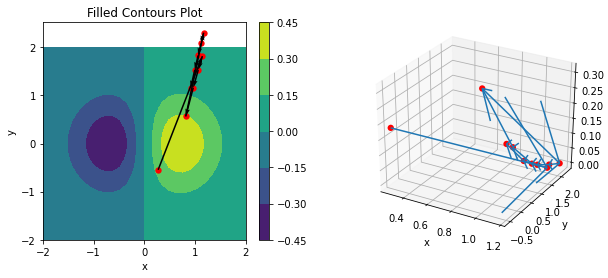

In [ ]:
linspace_x = torch.linspace(-2, 2, steps=30)
linspace_y = torch.linspace(-2, 2, steps=30)
X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
Z = f_alt(X,Y)

fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1)
cp = ax.contourf(X,Y,Z)
fig.colorbar(cp)

ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

points1 = torch.stack(points)
agents_x = points1[:, 0]
agents_y = points1[:, 1]
ax.scatter(agents_x, agents_y, s=40, lw=0, color='red')

plt.quiver(agents_x[:-1], agents_y[:-1], agents_x[1:] - agents_x[:-1], agents_y[1:] - agents_y[:-1], scale_units='xy', angles='xy', scale=1)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
agents_z = f_alt(agents_x, agents_y)
ax.scatter(agents_x, agents_y, agents_z, s=40, lw=0, color='red', alpha=1)

ax.quiver(agents_x[:-1], agents_y[:-1], agents_z[:-1], (agents_x[1:] - agents_x[:-1]), (agents_y[1:] - agents_y[:-1]), (agents_z[1:] - agents_z[:-1]), length=1)
